<a href="https://colab.research.google.com/github/rizzaesh/Data-Science-Tools/blob/main/data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import requests
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

# start with plot

In [13]:
x = np.linspace(0,10,500)
y = np.cumsum(np.random.randn(500,5),0)

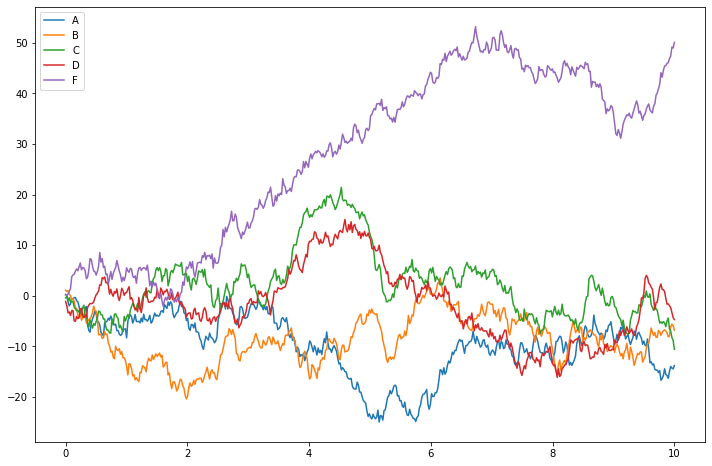

In [14]:
plt.figure(figsize = (12,8));
plt.plot(x,y);
plt.legend("ABCDF",ncol = 1, loc = 'upper left');

# get data 1

In [35]:
def get_historic(symbl, exchange = 'bitfinex', after = '2012-01-09'):
    url = f'http://api.cryptowat.ch/markets/{exchange}/{symbl}usd/ohlc'
    resp = requests.get(url,params={'periods':'86400','after':str(int(pd.Timestamp(after).timestamp()))})
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['86400'],columns = ['closetime','openprice','highpr','lowpr','closepr','volume','NA'])
    df['closetime'] = pd.to_datetime(df['closetime'],unit = 's')
    df.set_index('closetime',inplace = True)
    return df

In [ ]:
# periods can be : 3600, 60, 86400 and ...

In [36]:
btc = get_historic('btc','bitstamp')

In [37]:
btc

,openprice,highpr,lowpr,closepr,volume,NA
closetime,,,,,,
2013-04-24,137.300003,161.000000,134.979996,149.000000,21232.849609,0.000000e+00
2013-04-25,150.000000,170.279999,123.199997,141.899994,16566.091797,0.000000e+00
2013-04-26,141.899994,142.529999,126.680000,137.300003,10688.920898,0.000000e+00
2013-04-27,137.300003,148.610001,125.760002,128.800003,6686.075195,0.000000e+00
2013-04-28,128.800003,148.179993,121.570000,135.279999,5136.525391,0.000000e+00
...,...,...,...,...,...,...
2022-02-16,42567.270000,44785.660000,42469.960000,44582.480000,1772.923258,7.800057e+07
2022-02-17,44590.750000,44590.750000,43312.830000,43901.480000,1251.833594,5.499960e+07
2022-02-18,43901.490000,44204.780000,40088.880000,40556.110000,2437.490361,1.026582e+08


# get data 2

In [41]:
url = 'https://api.cryptowat.ch/markets/bitstamp/ethusd/ohlc'
resp = requests.get(url,params={'periods':'86400'})
resp.raise_for_status()
data = resp.json()

In [32]:
pd.Timestamp('2015-11-16 00:00:00').timestamp()

1447632000.0

In [31]:
pd.to_datetime(1447632000,unit = 's')

Timestamp('2015-11-16 00:00:00')

In [ ]:
data

In [42]:
# in below section you can transform a json file in a data frame.(actully the json is an data frame like csv, excel and ...)
df = pd.DataFrame(data['result']['86400'],columns = ['closetime','openprice','highpr','lowpr','closepr','volume','NA'])
df['closetime'] = pd.to_datetime(df['closetime'],unit = 's') # this line will changes Time like data to actual Time data
df.set_index('closetime',inplace = True) # this line will changes the index

In [34]:
df

,openprice,highpr,lowpr,closepr,volume,NA
closetime,,,,,,
2013-04-24,137.300003,161.000000,134.979996,149.000000,21232.849609,0.000000e+00
2013-04-25,150.000000,170.279999,123.199997,141.899994,16566.091797,0.000000e+00
2013-04-26,141.899994,142.529999,126.680000,137.300003,10688.920898,0.000000e+00
2013-04-27,137.300003,148.610001,125.760002,128.800003,6686.075195,0.000000e+00
2013-04-28,128.800003,148.179993,121.570000,135.279999,5136.525391,0.000000e+00
...,...,...,...,...,...,...
2022-02-16,42567.270000,44785.660000,42469.960000,44582.480000,1772.923258,7.800057e+07
2022-02-17,44590.750000,44590.750000,43312.830000,43901.480000,1251.833594,5.499960e+07
2022-02-18,43901.490000,44204.780000,40088.880000,40556.110000,2437.490361,1.026582e+08


In [38]:
btc = df

In [39]:
btc = btc.tail(1647) # to give tha last 1646 sample from dataset

In [43]:
eth = df #another time to give the eth data, please change the btc to eth in URL section

In [28]:
btc.to_csv("data.csv")

# static plot

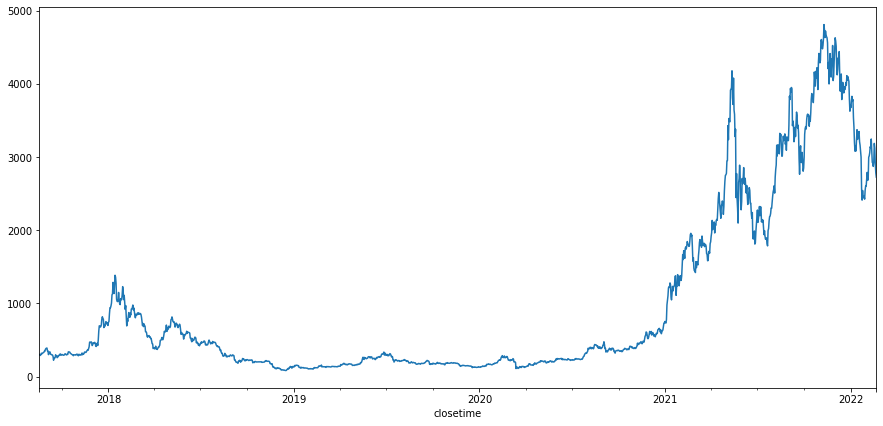

In [45]:
# btc['closepr'].plot(figsize = (15,7));
eth['closepr'].plot(figsize = (15,7));

# dynamic plot

In [46]:
from bokeh.plotting import figure,output_file, show
from bokeh.io import output_notebook

In [47]:
output_notebook()

In [54]:
#Remember this plot is kind of treaky, it wont work totaly fine until you cut your head off.
market = np.array([btc['closepr'],eth['closepr']])
pl = figure(x_axis_type = "datetime", title = "crypto",width = 800)
pl.grid.grid_line_alpha = 0.9
pl.xaxis.axis_label = 'date'
pl.yaxis.axis_label = "price"
# pl.line(eth.index,market[0].T,color = '#f2a900',legend_label = "bit")
pl.line(eth.index,market[1].T,color = '#599990',legend_label = "eth")
pl.legend.location = "top_left"
show(pl)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [49]:
show(pl)

# exporting not exporting

In [56]:
writer = pd.ExcelWriter("crypto.xlsx")

In [57]:
btc.to_excel(writer, sheet_name = "BitCoin")
eth.to_excel(writer, sheet_name = "Etherium")

In [58]:
writer.save()

# intro to numpy

In [59]:
import sys
import numpy as np

In [60]:
a = np.array([[1,2,3,4],[4,3,2,1]])

In [61]:
b = np.array([4,4,5,6])

In [62]:
c = np.array([a,b]) # this is wrong, find out why!?

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [63]:
c.shape

(2,)

In [64]:
a[0,0:2]

array([1, 2])

In [65]:
b[[0,1]]

array([4, 4])

In [66]:
a[[0]]

array([[1, 2, 3, 4]])

In [67]:
# better performance with low int data
a = np.array([1,2,3,10000],dtype = np.int16)
a

array([    1,     2,     3, 10000], dtype=int16)

In [68]:
c = np.array([[1,2,3],[4,5,6],[7,8,9]])
c

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [69]:
c[1,0:2]

array([4, 5])

In [70]:
c[:,1:3]

array([[2, 3],
       [5, 6],
       [8, 9]])

In [71]:
c[2:,:1]

array([[7]])

In [72]:
c.var(axis = 1)

array([0.66666667, 0.66666667, 0.66666667])

In [73]:
b

array([4, 4, 5, 6])

In [74]:
b.var()

0.6875

In [75]:
b.std()

0.82915619758885

# vectorization

In [ ]:
b

array([4, 4, 5, 6])

In [ ]:
b = np.arange(4)
b * 10

array([ 0, 10, 20, 30])

In [ ]:
[b[i]*10 for i in b]

[0, 10, 20, 30]

In [ ]:
b*10

array([ 0, 10, 20, 30])

In [ ]:
b+a

array([    1,     3,     5, 10003])

# boolian

In [ ]:
b = np.array([9,7,4,2])

In [ ]:
b[[True,False,False,False]]

array([9])

In [ ]:
br = b>=2
br

array([ True,  True,  True,  True])

In [ ]:
for i in b:
    if i==1:
        print(np.where(b==9))

In [ ]:
arr = np.array([11, 12, 13, 14, 15, 16, 17, 15, 11, 12, 14, 15, 16, 17])

In [ ]:
# result back the Where the data belongs
result = np.where(arr == 15)
print('Tuple of arrays returned : ', result)
print("Elements with value 15 exists at following indices", result[0], sep='\n')

Tuple of arrays returned :  (array([ 4,  7, 11]),)
Elements with value 15 exists at following indices
[ 4  7 11]


In [ ]:
arr[result[0]]

array([15, 15, 15])

In [ ]:
b[br]

array([9, 7, 4, 2])

In [ ]:
b[b>=3]

array([9, 7, 4])

In [ ]:
arr[(arr==15) | (arr==17)]

array([15, 17, 15, 15, 17])

In [ ]:
np.where((arr==15) | (arr==17))

(array([ 4,  6,  7, 11, 13]),)

# linear Algebra

In [ ]:
a.dot(b)

20035

In [ ]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
B = np.array([[43,23,42],[3,2,6],[12,543,56]])

In [ ]:
A @ B

array([[  85, 1656,  222],
       [ 259, 3360,  534],
       [ 433, 5064,  846]])

In [ ]:
A.dot(B.T).argmax()

8

# sizes

In [ ]:
sys.getsizeof(1)

28

In [ ]:
%time u = [i for i in range(1000)]

CPU times: user 89 µs, sys: 17 µs, total: 106 µs
Wall time: 110 µs


In [ ]:
%time y = np.arange(1000)

CPU times: user 23 µs, sys: 5 µs, total: 28 µs
Wall time: 32.2 µs


In [ ]:
%time sum([x**2 for x in u])

CPU times: user 417 µs, sys: 78 µs, total: 495 µs
Wall time: 505 µs


332833500

In [ ]:
%time np.sum(y**2)

CPU times: user 144 µs, sys: 27 µs, total: 171 µs
Wall time: 176 µs


332833500

# Numpy Functions

In [ ]:
np.random.random(10)

array([0.88353234, 0.78026175, 0.14133029, 0.27775868, 0.69938518,
       0.13143333, 0.77917012, 0.07848335, 0.54168087, 0.69984609])

In [ ]:
np.random.normal(10)

12.021989820805913

In [ ]:
np.random.rand(4)

array([0.87427311, 0.24733084, 0.81255585, 0.50388031])

In [ ]:
np.random.rand(2,4)

array([[0.48897948, 0.25248201, 0.24058519, 0.11665991],
       [0.50386725, 0.89292874, 0.7225526 , 0.29930793]])

In [ ]:
np.random.randn(2,4)

array([[-1.14320238, -2.48859928,  1.10036971, -0.64166978],
       [-0.04383247,  0.24639652,  1.47796655,  0.69607809]])

In [77]:
np.random.randint(1,40)

16

In [78]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [81]:
np.arange(1,10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [80]:
np.arange(0,1,0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [82]:
a = np.arange(10)

In [83]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [84]:
a.reshape(5,2)

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [85]:
np.linspace(0,1,5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [87]:
np.linspace(0,1,5,False)

array([0. , 0.2, 0.4, 0.6, 0.8])

In [88]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [89]:
np.zeros((5,5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [90]:
np.zeros((3,3),dtype=np.int8)

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=int8)

In [91]:
np.ones(5)

array([1., 1., 1., 1., 1.])

In [92]:
np.ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [93]:
np.empty(5)

array([1., 1., 1., 1., 1.])

In [94]:
np.empty((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [95]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [96]:
np.eye(3,3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [97]:
np.eye(6,3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [98]:
np.eye(3,7, k = 2) # k will say that where the one will started

array([[0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.]])

# Pandas Series

In [99]:
import pandas as np
import numpy as np

In [100]:
gdat = pd.Series(np.random.rand(10)*1000)

In [101]:
gdat

0    892.804791
1    237.933985
2    850.572779
3    476.126424
4    431.274879
5    924.048532
6    536.394602
7    207.243166
8    410.745917
9    300.610958
dtype: float64

In [102]:
gdat.name = 'random number'

In [103]:
gdat

0    892.804791
1    237.933985
2    850.572779
3    476.126424
4    431.274879
5    924.048532
6    536.394602
7    207.243166
8    410.745917
9    300.610958
Name: random number, dtype: float64

In [104]:
gdat.values

array([892.80479085, 237.93398478, 850.57277877, 476.12642411,
       431.27487947, 924.04853195, 536.39460234, 207.24316592,
       410.74591717, 300.6109583 ])

In [105]:
gdat[0]

892.8047908517485

In [106]:
gdat.index = ['a','b','c','d','e','f','g','h','i','j']

In [107]:
gdat.index

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object')

2:04

In [108]:
gdat * 100

a    89280.479085
b    23793.398478
c    85057.277877
d    47612.642411
e    43127.487947
f    92404.853195
g    53639.460234
h    20724.316592
i    41074.591717
j    30061.095830
Name: random number, dtype: float64

In [109]:
gdat.mean()

526.7756033670427

In [110]:
gdat

a    892.804791
b    237.933985
c    850.572779
d    476.126424
e    431.274879
f    924.048532
g    536.394602
h    207.243166
i    410.745917
j    300.610958
Name: random number, dtype: float64

In [111]:
TF = (gdat >300) & (gdat<700)

In [112]:
TF

a    False
b    False
c    False
d     True
e     True
f    False
g     True
h    False
i     True
j     True
Name: random number, dtype: bool

In [113]:
gdat[gdat<300]

b    237.933985
h    207.243166
Name: random number, dtype: float64

In [114]:
gdat.std()

270.50771264513867

In [115]:
np.log2(gdat)

a    9.802201
b    7.894418
c    9.732291
d    8.895201
e    8.752464
f    9.851825
g    9.067151
h    7.695181
i    8.682102
j    8.231754
Name: random number, dtype: float64

In [116]:
gdat[(gdat >300) & (gdat<700)]

d    476.126424
e    431.274879
g    536.394602
i    410.745917
j    300.610958
Name: random number, dtype: float64

In [117]:
gdat['a'] = 400.0

In [118]:
gdat

a    400.000000
b    237.933985
c    850.572779
d    476.126424
e    431.274879
f    924.048532
g    536.394602
h    207.243166
i    410.745917
j    300.610958
Name: random number, dtype: float64

In [119]:
gdat.iloc[2]

850.5727787681222

In [120]:
gdat[(gdat >300) & (gdat<700)] = gdat[(gdat >300) & (gdat<700)].mean() 

In [121]:
gdat

a    425.858797
b    237.933985
c    850.572779
d    425.858797
e    425.858797
f    924.048532
g    425.858797
h    207.243166
i    425.858797
j    425.858797
Name: random number, dtype: float64

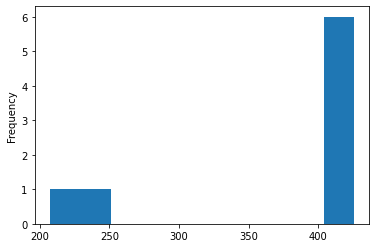

In [122]:
gdat[(gdat<700)].plot(kind = 'hist')

In [123]:
dataFrame = pd.DataFrame()
dataFrame['sam'] = np.random.rand(10)
dataFrame['sam10'] = np.random.rand(10)*10
dataFrame['sam20'] = np.random.rand(10)*20

# Pandas DataFrame

In [124]:
dataFrame

,sam,sam10,sam20
0,0.794628,9.679046,18.019078
1,0.124211,3.896606,7.889534
2,0.240949,7.481655,16.142921
3,0.414241,1.162485,12.993469
4,0.738140,7.978072,11.723709
5,0.770181,4.021871,12.195217
6,0.149527,6.897276,6.771070
7,0.668718,4.370241,12.767121
8,0.032739,9.916915,16.061875
9,0.763009,9.329720,4.560302


In [ ]:
dataFrame['sam'][0]

0.01143141278379567

In [ ]:
dataFrame.index = ['a','b','c','d','e','f','g','h','i','j']

In [ ]:
dataFrame[dataFrame > 10]

,sam,sam10,sam20
a,NaN,NaN,NaN
b,NaN,NaN,NaN
c,NaN,NaN,15.261849
d,NaN,NaN,17.497700
e,NaN,NaN,17.686520
f,NaN,NaN,NaN
g,NaN,NaN,13.223210
h,NaN,NaN,NaN
i,NaN,NaN,11.799974
j,NaN,NaN,18.342324


In [ ]:
dataFrame.columns

Index(['sam', 'sam10', 'sam20'], dtype='object')

In [ ]:
dataFrame.index

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object')

In [125]:
dataFrame.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sam     10 non-null     float64
 1   sam10   10 non-null     float64
 2   sam20   10 non-null     float64
dtypes: float64(3)
memory usage: 368.0 bytes


In [ ]:
dataFrame.describe()

,sam,sam10,sam20
count,10.000000,10.000000,10.000000
mean,0.527675,4.808816,11.683875
std,0.362412,2.097959,5.939750
min,0.003164,1.629537,0.793056
25%,0.286939,3.539021,8.650841
50%,0.557910,4.932843,12.511592
75%,0.811865,5.661578,16.938737
max,0.976795,9.103252,18.342324


In [ ]:
dataFrame.dtypes

sam      float64
sam10    float64
sam20    float64
dtype: object

In [ ]:
dataFrame.dtypes.value_counts()

float64    3
dtype: int64

In [ ]:
dataFrame.iloc[2] #give an entier row

sam       0.941286
sam10     5.512608
sam20    15.261849
Name: c, dtype: float64

In [ ]:
dataFrame['sam']

a    0.011431
b    0.003164
c    0.941286
d    0.354097
e    0.790675
f    0.976795
g    0.264554
h    0.818928
i    0.478876
j    0.636944
Name: sam, dtype: float64

In [ ]:
dataFrame.loc[['a','c']] #multiple row

,sam,sam10,sam20
a,0.011431,5.207885,4.344429
c,0.941286,5.512608,15.261849


In [ ]:
dataFrame.loc['a':'c',['sam','sam10']]

,sam,sam10
a,0.011431,5.207885
b,0.003164,3.228295
c,0.941286,5.512608


In [ ]:
dataFrame.iloc[0:4,1] #the one that cames after , thats the columns

a    5.207885
b    3.228295
c    5.512608
d    4.471198
Name: sam10, dtype: float64

In [ ]:
dataFrame['sam10'] > 5

a     True
b    False
c     True
d    False
e     True
f     True
g    False
h     True
i    False
j    False
Name: sam10, dtype: bool

In [ ]:
dataFrame.loc[dataFrame['sam20']>5,['sam']]

,sam
b,0.003164
c,0.941286
d,0.354097
e,0.790675
f,0.976795
g,0.264554
i,0.478876
j,0.636944


In [ ]:
dataFrame.drop('sam',axis =1)

,sam10,sam20
a,5.207885,4.344429
b,3.228295,9.532844
c,5.512608,15.261849
d,4.471198,17.497700
e,5.711234,17.686520
f,6.072940,8.356840
g,2.493407,13.223210
h,9.103252,0.793056
i,1.629537,11.799974
j,4.657801,18.342324


In [ ]:
dataFrame

,sam,sam10,sam20,c30
a,0.011431,5.207885,4.344429,2.0
b,0.003164,3.228295,9.532844,NaN
c,0.941286,5.512608,15.261849,4.0
d,0.354097,4.471198,17.497700,NaN
e,0.790675,5.711234,17.686520,NaN
f,0.976795,6.072940,8.356840,NaN
g,0.264554,2.493407,13.223210,NaN
h,0.818928,9.103252,0.793056,NaN
i,0.478876,1.629537,11.799974,NaN
j,0.636944,4.657801,18.342324,NaN


In [ ]:
dataFrame['sam'] * dataFrame['sam20']

a     0.049663
b     0.030158
c    14.365761
d     6.195885
e    13.984291
f     8.162922
g     3.498247
h     0.649456
i     5.650724
j    11.683029
dtype: float64

In [134]:
f = pd.Series([2,4],index = [1,2],name = 'language')

In [135]:
f

1    2
2    4
Name: language, dtype: int64

In [136]:
dataFrame['c30'] = f

In [137]:
dataFrame

,sam,sam10,sam20,c30
0,0.794628,9.679046,18.019078,NaN
1,0.124211,3.896606,7.889534,2.0
2,0.240949,7.481655,16.142921,4.0
3,0.414241,1.162485,12.993469,NaN
4,0.738140,7.978072,11.723709,NaN
5,0.770181,4.021871,12.195217,NaN
6,0.149527,6.897276,6.771070,NaN
7,0.668718,4.370241,12.767121,NaN
8,0.032739,9.916915,16.061875,NaN
9,0.763009,9.329720,4.560302,NaN


In [141]:
dataFrame['c30'].sum()

6.0

In [142]:
1 + np.nan

nan

In [145]:
dataFrame['c30'][6].dtype

dtype('float64')

2:33

In [154]:
datas = pd.read_csv('/content/data.csv',header = None,names = ['ssssss','dd'])
datas

,,,,,ssssss,dd
closetime,openprice,highpr,lowpr,closepr,volume,NaN
2017-08-19,4260.47,4368.0,3964.96,4100.0,17516.797,0.000000e+00
2017-08-20,4100.0,4188.0,3900.0,4099.55,15034.334,0.000000e+00
2017-08-21,4091.99,4125.95,4000.0,4058.64,6238.9565,0.000000e+00
2017-08-22,4058.58,4080.0,3949.78,3987.52,9780.953,0.000000e+00
...,...,...,...,...,...,...
2022-02-16,42567.27,44785.66,42469.96,44582.48,1772.92325828,7.800057e+07
2022-02-17,44590.75,44590.75,43312.83,43901.48,1251.8335942,5.499960e+07
2022-02-18,43901.49,44204.78,40088.88,40556.11,2437.49036088,1.026582e+08
2022-02-19,40532.66,40996.31,39450.0,39996.99,2212.7149201,8.913034e+07


In [164]:
datas = pd.read_csv('/content/data.csv',index_col = 0,parse_dates = True)
datas

,openprice,highpr,lowpr,closepr,volume,NA
closetime,,,,,,
2017-08-19,4260.47,4368.00,3964.96,4100.00,17516.797000,0.000000e+00
2017-08-20,4100.00,4188.00,3900.00,4099.55,15034.334000,0.000000e+00
2017-08-21,4091.99,4125.95,4000.00,4058.64,6238.956500,0.000000e+00
2017-08-22,4058.58,4080.00,3949.78,3987.52,9780.953000,0.000000e+00
2017-08-23,3987.51,4139.31,3600.00,4085.00,23522.334000,0.000000e+00
...,...,...,...,...,...,...
2022-02-16,42567.27,44785.66,42469.96,44582.48,1772.923258,7.800057e+07
2022-02-17,44590.75,44590.75,43312.83,43901.48,1251.833594,5.499960e+07
2022-02-18,43901.49,44204.78,40088.88,40556.11,2437.490361,1.026582e+08


# plot with pandas

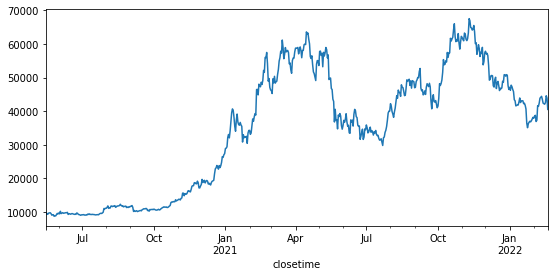

In [171]:
datas['openprice'][1000:-1].plot(figsize = (9,4))

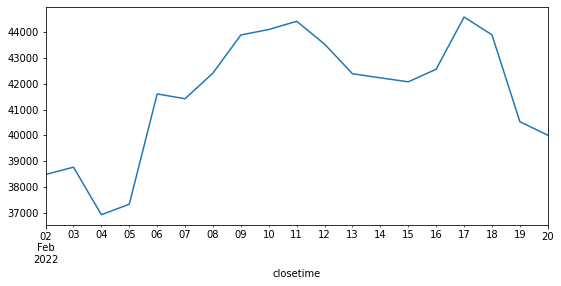

In [172]:
datas['openprice'].loc['2022-02-02':'2022-02-20'].plot(figsize = (9,4))

# what to do with missing datas

In [176]:
datas['d'] = np.nan

In [181]:
datas.isna()

,openprice,highpr,lowpr,closepr,volume,NA,d
closetime,,,,,,,
2017-08-19,False,False,False,False,False,False,True
2017-08-20,False,False,False,False,False,False,True
2017-08-21,False,False,False,False,False,False,True
2017-08-22,False,False,False,False,False,False,True
2017-08-23,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...
2022-02-16,False,False,False,False,False,False,True
2022-02-17,False,False,False,False,False,False,True
2022-02-18,False,False,False,False,False,False,True


In [182]:
datas.isnull()

,openprice,highpr,lowpr,closepr,volume,NA,d
closetime,,,,,,,
2017-08-19,False,False,False,False,False,False,True
2017-08-20,False,False,False,False,False,False,True
2017-08-21,False,False,False,False,False,False,True
2017-08-22,False,False,False,False,False,False,True
2017-08-23,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...
2022-02-16,False,False,False,False,False,False,True
2022-02-17,False,False,False,False,False,False,True
2022-02-18,False,False,False,False,False,False,True


In [185]:
datas.isnull().sum()

openprice       0
highpr          0
lowpr           0
closepr         0
volume          0
NA              0
d            1647
dtype: int64

In [186]:
datas.notnull().sum()

openprice    1647
highpr       1647
lowpr        1647
closepr      1647
volume       1647
NA           1647
d               0
dtype: int64

In [188]:
datas.dropna() # and Ooops it will drop every row hat has NaN value, and that means all the rows

,openprice,highpr,lowpr,closepr,volume,NA,d
closetime,,,,,,,


In [190]:
datas.dropna(how = 'any')

,openprice,highpr,lowpr,closepr,volume,NA,d
closetime,,,,,,,


In [192]:
datas.dropna(how = 'all')

,openprice,highpr,lowpr,closepr,volume,NA,d
closetime,,,,,,,
2017-08-19,4260.47,4368.00,3964.96,4100.00,17516.797000,0.000000e+00,NaN
2017-08-20,4100.00,4188.00,3900.00,4099.55,15034.334000,0.000000e+00,NaN
2017-08-21,4091.99,4125.95,4000.00,4058.64,6238.956500,0.000000e+00,NaN
2017-08-22,4058.58,4080.00,3949.78,3987.52,9780.953000,0.000000e+00,NaN
2017-08-23,3987.51,4139.31,3600.00,4085.00,23522.334000,0.000000e+00,NaN
...,...,...,...,...,...,...,...
2022-02-16,42567.27,44785.66,42469.96,44582.48,1772.923258,7.800057e+07,NaN
2022-02-17,44590.75,44590.75,43312.83,43901.48,1251.833594,5.499960e+07,NaN
2022-02-18,43901.49,44204.78,40088.88,40556.11,2437.490361,1.026582e+08,NaN


In [198]:
datas.dropna(thresh = 6) # this number refers to number of valid data in any rows

,openprice,highpr,lowpr,closepr,volume,NA,d
closetime,,,,,,,
2017-08-19,4260.47,4368.00,3964.96,4100.00,17516.797000,0.000000e+00,NaN
2017-08-20,4100.00,4188.00,3900.00,4099.55,15034.334000,0.000000e+00,NaN
2017-08-21,4091.99,4125.95,4000.00,4058.64,6238.956500,0.000000e+00,NaN
2017-08-22,4058.58,4080.00,3949.78,3987.52,9780.953000,0.000000e+00,NaN
2017-08-23,3987.51,4139.31,3600.00,4085.00,23522.334000,0.000000e+00,NaN
...,...,...,...,...,...,...,...
2022-02-16,42567.27,44785.66,42469.96,44582.48,1772.923258,7.800057e+07,NaN
2022-02-17,44590.75,44590.75,43312.83,43901.48,1251.833594,5.499960e+07,NaN
2022-02-18,43901.49,44204.78,40088.88,40556.11,2437.490361,1.026582e+08,NaN


In [200]:
datas.dropna(thresh = 6,axis ="columns") # this number refers to number of valid data in any columns

,openprice,highpr,lowpr,closepr,volume,NA
closetime,,,,,,
2017-08-19,4260.47,4368.00,3964.96,4100.00,17516.797000,0.000000e+00
2017-08-20,4100.00,4188.00,3900.00,4099.55,15034.334000,0.000000e+00
2017-08-21,4091.99,4125.95,4000.00,4058.64,6238.956500,0.000000e+00
2017-08-22,4058.58,4080.00,3949.78,3987.52,9780.953000,0.000000e+00
2017-08-23,3987.51,4139.31,3600.00,4085.00,23522.334000,0.000000e+00
...,...,...,...,...,...,...
2022-02-16,42567.27,44785.66,42469.96,44582.48,1772.923258,7.800057e+07
2022-02-17,44590.75,44590.75,43312.83,43901.48,1251.833594,5.499960e+07
2022-02-18,43901.49,44204.78,40088.88,40556.11,2437.490361,1.026582e+08


In [ ]:
#how was just for columns and thresh is for both

In [213]:
datas.fillna(datas['volume'].mean()) # fill nun's with the values

,openprice,highpr,lowpr,closepr,volume,NA,d
closetime,,,,,,,
2017-08-19,4260.47,4368.00,3964.96,4100.00,17516.797000,0.000000e+00,8484.941382
2017-08-20,4100.00,4188.00,3900.00,4099.55,15034.334000,0.000000e+00,8484.941382
2017-08-21,4091.99,4125.95,4000.00,4058.64,6238.956500,0.000000e+00,8484.941382
2017-08-22,4058.58,4080.00,3949.78,3987.52,9780.953000,0.000000e+00,8484.941382
2017-08-23,3987.51,4139.31,3600.00,4085.00,23522.334000,0.000000e+00,8484.941382
...,...,...,...,...,...,...,...
2022-02-16,42567.27,44785.66,42469.96,44582.48,1772.923258,7.800057e+07,8484.941382
2022-02-17,44590.75,44590.75,43312.83,43901.48,1251.833594,5.499960e+07,8484.941382
2022-02-18,43901.49,44204.78,40088.88,40556.11,2437.490361,1.026582e+08,8484.941382


In [215]:
datas.fillna(method = "ffill") #  or bfill  this methods work like first starts from up and goes down and fill every nan with last value, and foe bfill it start from down and goes up (down and up is direction in table)

,openprice,highpr,lowpr,closepr,volume,NA,d
closetime,,,,,,,
2017-08-19,4260.47,4368.00,3964.96,4100.00,17516.797000,0.000000e+00,NaN
2017-08-20,4100.00,4188.00,3900.00,4099.55,15034.334000,0.000000e+00,NaN
2017-08-21,4091.99,4125.95,4000.00,4058.64,6238.956500,0.000000e+00,NaN
2017-08-22,4058.58,4080.00,3949.78,3987.52,9780.953000,0.000000e+00,NaN
2017-08-23,3987.51,4139.31,3600.00,4085.00,23522.334000,0.000000e+00,NaN
...,...,...,...,...,...,...,...
2022-02-16,42567.27,44785.66,42469.96,44582.48,1772.923258,7.800057e+07,NaN
2022-02-17,44590.75,44590.75,43312.83,43901.48,1251.833594,5.499960e+07,NaN
2022-02-18,43901.49,44204.78,40088.88,40556.11,2437.490361,1.026582e+08,NaN


In [218]:
datas.any()

openprice     True
highpr        True
lowpr         True
closepr       True
volume        True
NA            True
d            False
dtype: bool

In [220]:
datas.columns

Index(['openprice', 'highpr', 'lowpr', 'closepr', 'volume', 'NA', 'd'], dtype='object')

In [223]:
datas['closepr'].unique()

array([ 4100.  ,  4099.55,  4058.64, ..., 40556.11, 39996.99, 39768.76])

In [224]:
len(datas['closepr'].unique())

1646

In [228]:
dg = pd.DataFrame()
dg['f'] = [1,2,3,3,1,4,5,6]


In [231]:
dg['f'].unique()

array([1, 2, 3, 4, 5, 6])

In [238]:
dg['f'].drop_duplicates(keep = 'last') #keep tha last one

1    2
3    3
4    1
5    4
6    5
7    6
Name: f, dtype: int64

In [239]:
dg['f'].drop_duplicates(keep = False) # keep no one 

1    2
5    4
6    5
7    6
Name: f, dtype: int64

In [241]:
h = pd.DataFrame()
h['h'] = ['re','re re','rt ty_ty']

In [243]:
h['h'].str.split(" ")

0           [re]
1       [re, re]
2    [rt, ty_ty]
Name: h, dtype: object

In [245]:
h['h'].str.split("_",expand = True) # remeber the (expand) 

,0,1
0,re,None
1,re re,None
2,rt ty,ty


In [247]:
h['g'] = ["kadah31/dkodad","lahd;a9bd;awd","ladhliahldawd"]

In [260]:
h['g'].str.replace(r'\d{4}'," ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


0    kadah31/dkodad
1     lahd;a9bd;awd
2     ladhliahldawd
Name: g, dtype: object

# visualization

norma

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x = np.arange(-10,11)
x

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9,  10])

In [4]:
plt.figure(figsize = (13,5))

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

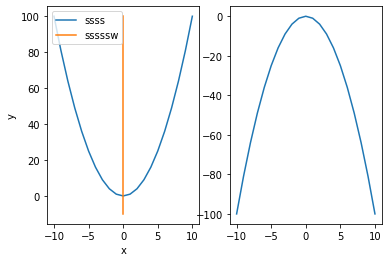

In [5]:
plt.title("dddd")
plt.subplot(1,2,1)
plt.plot(x, x ** 2)
plt.plot([0,0,0],[-10, 0, 100])
plt.xlabel("x")
plt.ylabel("y")
plt.legend(['ssss','sssssw'],loc = 'upper left')
plt.subplot(1,2,2)
plt.plot(x, -1 * x ** 2)

# OOP

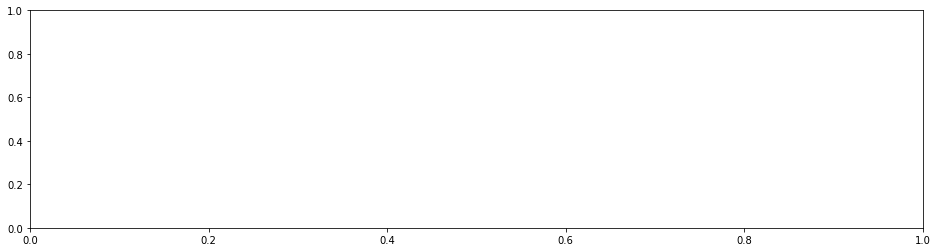

In [6]:
fig, axes = plt.subplots(figsize = (16,4))

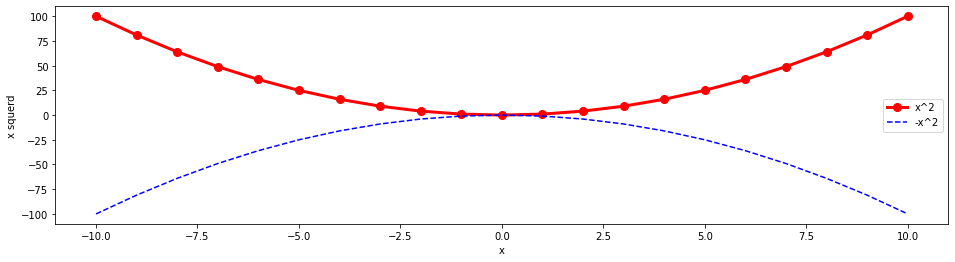

In [7]:
axes.plot(
    x, x ** 2, color = 'red',
    linewidth = 3,
    marker = 'o', markersize = 8,
    label = 'x^2' 
)
axes.plot(x, -1 * (x) ** 2, 'b--', label = '-x^2')

axes.set_xlabel("x")
axes.set_ylabel("x squerd")
axes.legend()

fig

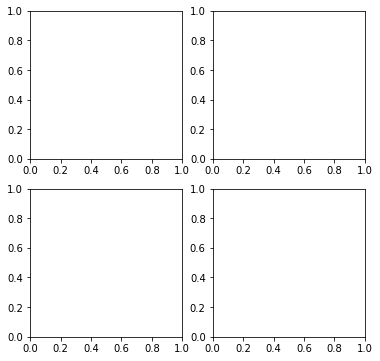

In [24]:
fig , ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols= 2, figsize = (6,6))

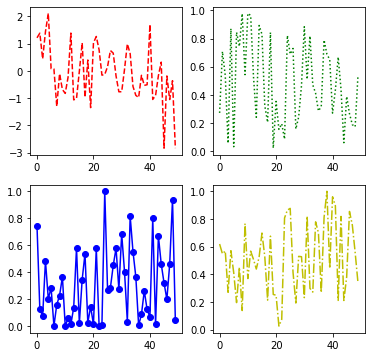

In [17]:
# fig , ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols= 2, figsize = (6,6))
ax1.plot(np.random.randn(50), c = 'r', linestyle = '--')
ax2.plot(np.random.rand(50), c = 'g', linestyle = ':')
ax3.plot(np.random.rand(50) ** 2, c = 'b',marker = 'o')
ax4.plot(np.random.rand(50), c = 'y', linestyle = 'dashdot')
# linestyle : solid, dashed, dashdot, dotted, --, :, --og, --c, -.b,:r
fig

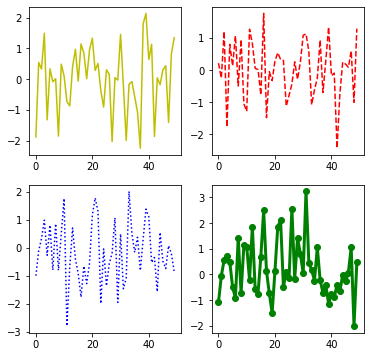

In [23]:
ax1.plot(np.random.randn(50), c = 'y')
ax2.plot(np.random.randn(50), c = 'r', linestyle = '--')
ax3.plot(np.random.randn(50), c = 'b', linestyle = ':')
ax4.plot(np.random.randn(50), c = 'g', marker = 'o', linewidth = 3)

fig

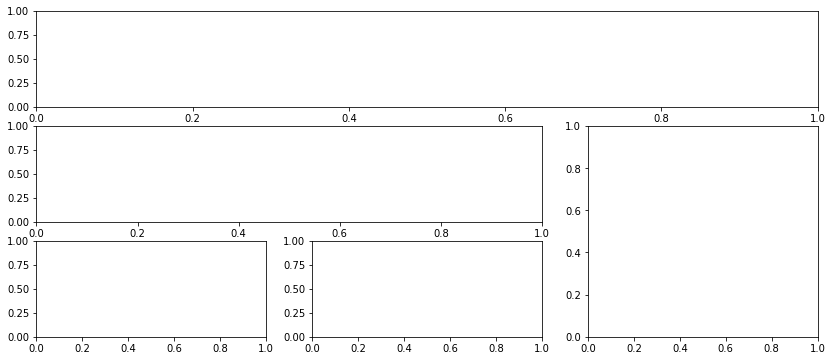

In [31]:
plt.figure(figsize = (14,6))

ax1 = plt.subplot2grid((3,3),(0,0), colspan = 3)
ax2 = plt.subplot2grid((3,3),(1,0), colspan = 2)
ax3 = plt.subplot2grid((3,3),(1,2), rowspan = 2)
ax4 = plt.subplot2grid((3,3),(2,0))
ax5 = plt.subplot2grid((3,3),(2,1))

# scatter plot

# machine learning

In [ ]:
Y_ = [f'{i}' for i in range(len(btc['closepr']))]

In [ ]:
X, x, Y, y = train_test_split(btc,btc['closepr'])

In [ ]:
X = X.drop('closetime',axis = 1)
X = X.drop('closepr',axis = 1)

In [ ]:
x = x.drop('closetime',axis = 1)
x = x.drop('closepr',axis = 1)

In [ ]:
cls = DecisionTreeRegressor()

In [ ]:
cls.fit(X,Y)

In [ ]:
pre =cls.predict(x)

In [ ]:
cls.score(x,y)

In [ ]:
# cls.de

In [ ]:
import numpy as np

In [ ]:
y_true = np.array(y)
y_pred = np.array(pre)

In [ ]:
y_true[1]

35684.82

In [ ]:
scores = np.zeros(len(y_pred))

In [ ]:
for i in range(len(y_pred)):
    scores[i] = y_true[i]-y_pred[i]

In [ ]:
scores.min()

-699.369999999999

In [ ]:
data = pd.DataFrame()

In [ ]:
data['pred'] = y_pred
data['true'] = y_true
data['dif'] = scores

In [ ]:
data['dif'].plot()

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/A/Data Science 1/master_dataset.csv')
data

,ip.src,ip.dst,ip.len,ip.flags.df,ip.flags.mf,ip.fragment,ip.fragment.count,ip.fragments,ip.ttl,ip.proto,tcp.window_size,tcp.ack,tcp.seq,tcp.len,tcp.stream,tcp.urgent_pointer,tcp.flags,tcp.analysis.ack_rtt,tcp.segments,tcp.reassembled.length,http.request,udp.port,frame.time_relative,frame.time_delta,tcp.time_relative,tcp.time_delta,label
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,0,0,0,0.000000,0.000000,0.000000,0.000000,bruteforce
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,0,0,0,4.724600,4.724600,0.000000,0.000000,bruteforce
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,0,0,0,7.588901,2.864301,0.000000,0.000000,bruteforce
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,0,0,0,9.412412,1.823511,0.000000,0.000000,bruteforce
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0,0,0,0,14.162453,4.750041,0.000000,0.000000,bruteforce
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16461,167772687,167772674,91,1,0,0,0,0,64,6,64256,67,5,39,1,0,24,0.000000,1,43,0,0,173.878489,0.001952,10.006025,0.001952,sqlattack
16462,167772674,167772687,52,1,0,0,0,0,64,6,5824,44,67,0,1,0,16,0.001952,0,0,0,0,173.880441,0.001952,10.007977,0.001952,sqlattack
16463,167772674,167772687,63,1,0,0,0,0,64,6,5824,44,67,11,1,0,24,0.000000,0,0,0,0,173.880441,0.000000,10.007977,0.000000,sqlattack
16464,167772687,167772674,52,1,0,0,0,0,64,6,64256,78,44,0,1,0,16,0.001953,0,0,0,0,173.882394,0.001953,10.009930,0.001953,sqlattack


In [ ]:
data['tcp.stream'].value_counts()

0       2695
1         74
10        66
4         66
6         66
        ... 
703        2
702        2
701        2
700        2
2043       2
Name: tcp.stream, Length: 2044, dtype: int64

In [ ]:
ml = DecisionTreeClassifier()

In [ ]:
X,x,Y,y = train_test_split(data.drop('label',axis = 1),data['label'])

In [ ]:
ml.fit(X,Y)

DecisionTreeClassifier()

In [ ]:
yp = ml.predict(x)

In [ ]:
accuracy_score(yp,y)

0.9822686422152053

In [ ]:
ml.score(x,y)

0.9822686422152053

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
ml.feature_importances_

array([0.        , 0.        , 0.00133153, 0.05231624, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.1900111 ,
       0.00890484, 0.        , 0.00594352, 0.        , 0.53794656,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00222054, 0.0891264 , 0.02246975, 0.08972952,
       0.        ])

In [ ]:
data.columns[14]

'tcp.stream'

In [ ]:
cls.feature_names_in_

array(['openprice', 'highpr', 'lowpr', 'volume', 'NA'], dtype=object)

In [ ]:
cls.feature_importances_

array([8.19570127e-05, 8.95148055e-01, 1.04697013e-01, 3.87732413e-05,
       3.42021748e-05])

In [ ]:
ml.feature_names_in_

array(['ip.src', 'ip.dst', 'ip.len', 'ip.flags.df', 'ip.flags.mf',
       'ip.fragment', 'ip.fragment.count', 'ip.fragments', 'ip.ttl',
       'ip.proto', 'tcp.window_size', 'tcp.ack', 'tcp.seq', 'tcp.len',
       'tcp.stream', 'tcp.urgent_pointer', 'tcp.flags',
       'tcp.analysis.ack_rtt', 'tcp.segments', 'tcp.reassembled.length',
       'http.request', 'udp.port', 'frame.time_relative',
       'frame.time_delta', 'tcp.time_relative', 'tcp.time_delta'],
      dtype=object)

In [ ]:
sns.countplot(data['tcp.stream'])